In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#data generation
y=x^2+5*x+3

In [2]:
x=np.arange(-80,81,0.5) # range adadi ke mikham ro moshakhas mikonam ke beyne -80 ta 80 hast ba tole gaame 0.5
y=x**2+5*x+3
y.shape

(322,)

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) # jodasazi dade train va dade test khodemon
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((257,), (65,), (257,), (65,))

#model definition 2

In [4]:
model_2=keras.Sequential()# dar model dovomemon bejaye inke laye aval 1024 ta layer dashte bashe, ma 4 ta laye 256 tarif mikonim
#ba in kar mikhaym bebin farghe ye laye 1024 neruni ba 4 ta laye 256 neruni che tasiri dar model ma baraye train migzare
model_2.add(keras.layers.Dense(units=256,activation='relu',input_shape=[1]))
model_2.add(keras.layers.Dense(units=256,activation='relu'))
model_2.add(keras.layers.Dense(units=256,activation='relu'))
model_2.add(keras.layers.Dense(units=256,activation='relu'))
model_2.add(keras.layers.Dense(units=1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
optimizer=keras.optimizers.Adam(learning_rate=0.001)
loss=keras.losses.MeanSquaredError
model_2.compile(optimizer=optimizer,loss=loss)

In [19]:
early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=100,restore_best_weights=True)

In [23]:
hist=model_2.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test),callbacks=[early_stopping])

Epoch 1/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 47492.6992 - val_loss: 160196.0312
Epoch 2/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 66100.0781 - val_loss: 17635.3125
Epoch 3/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 19802.3730 - val_loss: 2224.7939
Epoch 4/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8035.5830 - val_loss: 11813.1406
Epoch 5/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12209.1338 - val_loss: 8465.8018
Epoch 6/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3632.8096 - val_loss: 14134.8691
Epoch 7/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 30873.4160 - val_loss: 20893.4727
Epoch 8/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11787.5781 - val_loss: 4572.7153
Epoch 9/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4326.9707 - val_loss: 3728.4563
Epoch 10/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3968.0330 - val_loss: 7116.1470
Epoch 11/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2685.2104 - val_loss: 1484.2065


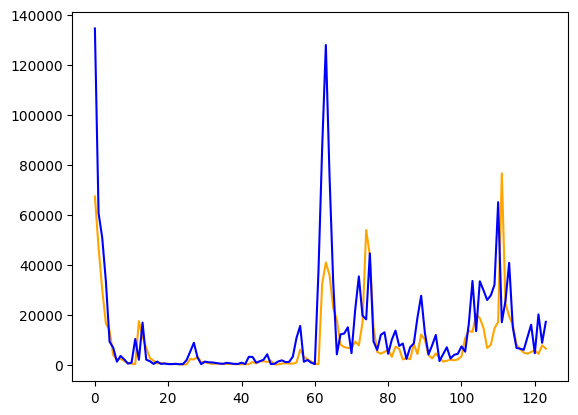

In [21]:
plt.plot(hist.history['loss'],color='orange')
plt.plot(hist.history['val_loss'],color='blue')

In [27]:
# Train the model with early stopping and get the history
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=200, restore_best_weights=True)
history = model_2.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the validation or test set to confirm the performance with best weights
val_loss = model_2.evaluate(x_test, y_test)
print(f"Validation loss after training: {val_loss}")

# Find the minimum validation loss and its epoch
min_val_loss = min(history.history['val_loss'])
min_val_loss_epoch = history.history['val_loss'].index(min_val_loss)
print(f"Minimum validation loss: {min_val_loss} at epoch {min_val_loss_epoch + 1}")


Epoch 1/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7840.4927 - val_loss: 22162.5879
Epoch 2/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10830.3018 - val_loss: 8646.1709
Epoch 3/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5580.2256 - val_loss: 7295.0952
Epoch 4/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4493.2593 - val_loss: 15987.3682
Epoch 5/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8564.3672 - val_loss: 22067.0684
Epoch 6/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5561.4097 - val_loss: 13108.7725
Epoch 7/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4657.3335 - val_loss: 2292.3406
Epoch 8/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1398.2766 - val_loss: 2067.4302
Epoch 9/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 799.2482 - val_loss: 951.4372
Epoch 10/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1015.9984 - val_loss: 5689.3691
Epoch 11/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3052.9893 - val_loss: 13736.1504
Epoch 